<a href="https://colab.research.google.com/github/alissonjcjk/Projeto-A.M/blob/main/Projeto_AM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
Projeto A.M

/content/Projeto-A.M


# Definição de bibliotecas

In [17]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
import urllib.request

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import  train_test_split, GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay ,mean_absolute_error, accuracy_score,mean_squared_log_error,classification_report

from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [18]:
# Carregar corretamente o arquivo com separação por espaços
os.makedirs("data", exist_ok=True)
path = "data/yeast.data"
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/yeast/yeast.data"

# baixa se não existir
if not os.path.exists(path):
    urllib.request.urlretrieve(url, path)

data = pd.read_csv(path, sep=r'\s+', header=None)
data.columns = [
    'name',  # Nome da sequência: identificador da proteína no banco SWISS-PROT
    'mcg',   # McGeoch's method: método de reconhecimento de sequência sinal (score numérico)
    'gvh',   # von Heijne's method: outro método de reconhecimento de sequência sinal (score numérico)
    'alm',   # ALOM score: pontuação do programa ALOM para predição de regiões transmembrana
    'mit',   # Mitochondrial discriminant: score da análise discriminante do conteúdo de aminoácidos na região N-terminal (20 resíduos) para distinguir proteínas mitocondriais de não-mitocondriais
    'erl',   # HDEL presence: atributo binário (0 ou 1) indicando a presença do motivo "HDEL", sinal de retenção no lúmen do retículo endoplasmático
    'pox',   # Peroxisomal targeting signal: score indicando a presença de sinal de direcionamento para peroxissomos no extremo C-terminal
    'vac',   # Vacuolar discriminant: score da análise discriminante do conteúdo de aminoácidos para distinguir proteínas vacuolares de extracelulares
    'nuc',   # Nuclear localization signal: score da análise discriminante de sinais de localização nuclear (proteínas nucleares vs não nucleares)
    'class'  # Classe-alvo: localização celular da proteína (ex: CYT, NUC, MIT, etc.) — variável categórica não numérica
]
data

,name,mcg,gvh,alm,mit,erl,pox,vac,nuc,class
0,ADT1_YEAST,0.58,0.61,0.47,0.13,0.5,0.0,0.48,0.22,MIT
1,ADT2_YEAST,0.43,0.67,0.48,0.27,0.5,0.0,0.53,0.22,MIT
2,ADT3_YEAST,0.64,0.62,0.49,0.15,0.5,0.0,0.53,0.22,MIT
3,AAR2_YEAST,0.58,0.44,0.57,0.13,0.5,0.0,0.54,0.22,NUC
4,AATM_YEAST,0.42,0.44,0.48,0.54,0.5,0.0,0.48,0.22,MIT
...,...,...,...,...,...,...,...,...,...,...
1479,YUR1_YEAST,0.81,0.62,0.43,0.17,0.5,0.0,0.53,0.22,ME2
1480,ZIP1_YEAST,0.47,0.43,0.61,0.40,0.5,0.0,0.48,0.47,NUC
1481,ZNRP_YEAST,0.67,0.57,0.36,0.19,0.5,0.0,0.56,0.22,ME2
1482,ZUO1_YEAST,0.43,0.40,0.60,0.16,0.5,0.0,0.53,0.39,NUC


In [19]:
# Quantidades de exemplos para cada classe:
data['class'].value_counts()

,count
class,
CYT,463
NUC,429
MIT,244
ME3,163
ME2,51
ME1,44
EXC,35
VAC,30
POX,20


# Codicação das classes

In [20]:
from sklearn.preprocessing import LabelEncoder

# Supondo que 'data' já está carregado e com colunas nomeadas
le = LabelEncoder()

# Cria uma nova coluna 'class_encoded' com valores numéricos (0, 1, 2, ...)
data['class_encoded'] = le.fit_transform(data['class'])
data

,name,mcg,gvh,alm,mit,erl,pox,vac,nuc,class,class_encoded
0,ADT1_YEAST,0.58,0.61,0.47,0.13,0.5,0.0,0.48,0.22,MIT,6
1,ADT2_YEAST,0.43,0.67,0.48,0.27,0.5,0.0,0.53,0.22,MIT,6
2,ADT3_YEAST,0.64,0.62,0.49,0.15,0.5,0.0,0.53,0.22,MIT,6
3,AAR2_YEAST,0.58,0.44,0.57,0.13,0.5,0.0,0.54,0.22,NUC,7
4,AATM_YEAST,0.42,0.44,0.48,0.54,0.5,0.0,0.48,0.22,MIT,6
...,...,...,...,...,...,...,...,...,...,...,...
1479,YUR1_YEAST,0.81,0.62,0.43,0.17,0.5,0.0,0.53,0.22,ME2,4
1480,ZIP1_YEAST,0.47,0.43,0.61,0.40,0.5,0.0,0.48,0.47,NUC,7
1481,ZNRP_YEAST,0.67,0.57,0.36,0.19,0.5,0.0,0.56,0.22,ME2,4
1482,ZUO1_YEAST,0.43,0.40,0.60,0.16,0.5,0.0,0.53,0.39,NUC,7


# Definição de Features

In [21]:
# Definir features (X) e alvo (y)
X = data.drop(['name', 'class_encoded','class'], axis=1)  # Remove colunas não preditivas
y = data['class_encoded']                         # Variável alvo: localização celular

In [22]:
# Dividir em 70% treino e 30% teste, com estratificação pela classe
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.30,          # 30% para teste
    stratify=y,              # Mantém a proporção de cada classe em treino e teste
    random_state=42          # Reprodutibilidade
)

In [7]:
train_X, val_X, train_y, val_y = train_test_split( X_train, y_train, random_state = 0)

In [23]:
train_X

,mcg,gvh,alm,mit,erl,pox,vac,nuc
649,0.61,0.59,0.47,0.49,0.5,0.0,0.54,0.22
358,0.27,0.51,0.47,0.35,0.5,0.0,0.49,0.28
1174,0.51,0.48,0.51,0.26,0.5,0.0,0.51,0.27
77,0.50,0.54,0.53,0.54,0.5,0.0,0.51,0.27
467,0.43,0.51,0.60,0.25,0.5,0.0,0.55,0.22
...,...,...,...,...,...,...,...,...
692,0.33,0.48,0.55,0.16,0.5,0.0,0.53,0.75
117,0.47,0.47,0.57,0.48,0.5,0.0,0.48,0.22
1421,0.63,0.65,0.42,0.18,0.5,0.0,0.54,0.27
403,0.53,0.43,0.47,0.15,0.5,0.0,0.58,0.22


In [9]:
train_y

,class_encoded
649,6
358,7
1174,0
77,6
467,0
...,...
692,7
117,6
1421,5
403,0


# Treinamentos:

## Árvores de decisão

## Naive Bayes (Bayesiano ingênuo) GaussianNB

Normalmente não seria necessário o uso de hiperparâmetros no gaussian para essa base de dados, pois o hiperparâmetro mais conhecido é o VAR_SMOOTING que é utilizado para evitar divisão por zero, no caso, quando todas as amostras de treino de uma classe tem o mesmo valor. Isso não acontece no yeast, tornando desnecessário a utlização desse hiperparâmetro. Portanto demonstrarei as duas formas.

In [24]:
modelo_naive_bayes = GaussianNB()

modelo_naive_bayes.fit(train_X, train_y)
print("modelo treinado")

y_previsto = modelo_naive_bayes.predict(val_X)

print("modelo de classificação Naive bayes padrão")
print(classification_report(val_y, y_previsto,digits=4))
print("Acurácia: ", accuracy_score(val_y, y_previsto))


modelo treinado
modelo de classificação Naive bayes padrão
              precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000        80
           1     0.0000    0.0000    0.0000         0
           2     0.2593    1.0000    0.4118         7
           3     0.3571    0.6250    0.4545         8
           4     0.0000    0.0000    0.0000         7
           5     1.0000    0.0286    0.0556        35
           6     1.0000    0.1915    0.3214        47
           7     0.6333    0.2639    0.3725        72
           8     0.0000    0.0000    0.0000         1
           9     0.0113    0.6667    0.0222         3

    accuracy                         0.1654       260
   macro avg     0.3261    0.2776    0.1638       260
weighted avg     0.5089    0.1654    0.1941       260

Acurácia:  0.16538461538461538


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_

Naive bayes com o hiperparâmetro var_smooting otimizado com gridsearchCV

In [11]:

instancia_base = GaussianNB()

grade_parametros_nv = {
    #grade de parametros para treinar. Testarei 100 valores entre 1e-12 e 1.0
    'var_smoothing': np.logspace(-12,0, num=100)
}

gridsearch_nv = GridSearchCV(
    estimator = instancia_base,
    param_grid= grade_parametros_nv,
    cv = 5,
    scoring = 'f1_weighted',
    n_jobs = -1
)

#procurar o melhor modelo
gridsearch_nv.fit(train_X, train_y)
print("modelo treinado")

#pegar o melhor modelo
modelo_naive_bayes_otimizado = gridsearch_nv.best_estimator_
print(f"melhor var_smoothing: {modelo_naive_bayes_otimizado.var_smoothing}")

melhor_y_previsto = modelo_naive_bayes_otimizado.predict(val_X)

print("modelo de classificação Naive bayes otimizado")
print(classification_report(val_y, melhor_y_previsto,digits=4))


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


modelo treinado
melhor var_smoothing: 0.18738174228603868
modelo de classificação Naive bayes otimizado
              precision    recall  f1-score   support

           0     0.5268    0.7375    0.6146        80
           1     0.0000    0.0000    0.0000         0
           2     0.3846    0.7143    0.5000         7
           3     0.7500    0.7500    0.7500         8
           4     0.3333    0.1429    0.2000         7
           5     0.8065    0.7143    0.7576        35
           6     0.7222    0.5532    0.6265        47
           7     0.5660    0.4167    0.4800        72
           8     0.0000    0.0000    0.0000         1
           9     0.0000    0.0000    0.0000         3

    accuracy                         0.5846       260
   macro avg     0.4089    0.4029    0.3929       260
weighted avg     0.6004    0.5846    0.5792       260



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Regressão logística

Aqui é excencial o escalonamento dos dados, pois a R.L envolve coeficientes que serão multiplicados pelas variáveis de entrada,logo, caso tenham variáveis em escalas altas, o modelo será mais sensível a elas. Usarei o standartScaler para tanto

In [12]:
escalonador = StandardScaler()

escalonador.fit(train_X)

train_X_escalonado = escalonador.transform(train_X)
val_X_escalonado = escalonador.transform(val_X)

print("dados escalonados")

dados escalonados


Otimização dos hiperparâmetros penalty, c(inverso da força de regularização), solver(o otimizador)

In [13]:
regressao_log = LogisticRegression(random_state=42, max_iter=5000)
#max_iter maior garante que o solver tenha mais tempo de convergir
grade_parametros_rl = {
    'penalty': ['l1', 'l2'],
    'C': [0.01, 0.0, 1, 10, 100],
    'solver': ['saga']
}

#busca dos melhores parâmetros
gridsearch_rl = GridSearchCV(
    estimator = regressao_log,
    param_grid= grade_parametros_rl,
    cv = 5,
    scoring = 'f1_weighted',
    n_jobs = -1
)

#busca nos dados de treino escalonados
gridsearch_rl.fit(train_X_escalonado, train_y)
print("modelo treinado")

print(f"melhores parametros encontrados para a regressão logística: {gridsearch_rl.best_params_}")
#pegar o melhor modelo
modelo_rl_otimizado = gridsearch_rl.best_estimator_

/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
10 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  Fi

modelo treinado
melhores parametros encontrados para a regressão logística: {'C': 1, 'penalty': 'l2', 'solver': 'saga'}


Avaliação final no conjunto de teste

In [ ]:
y_previsto_rl = modelo_rl_otimizado.predict(val_X_escalonado)

print("modelo de classificação Regressão Logística otimizado")
print(classification_report(val_y, y_previsto_rl,digits=4))

modelo de classificação Regressão Logística otimizado
              precision    recall  f1-score   support

           0     0.5773    0.7000    0.6328        80
           2     0.6000    0.4286    0.5000         7
           3     0.5556    0.6250    0.5882         8
           4     0.3333    0.2857    0.3077         7
           5     0.7568    0.8000    0.7778        35
           6     0.6750    0.5745    0.6207        47
           7     0.5606    0.5139    0.5362        72
           8     0.0000    0.0000    0.0000         1
           9     0.0000    0.0000    0.0000         3

    accuracy                         0.6077       260
   macro avg     0.4510    0.4364    0.4404       260
weighted avg     0.5990    0.6077    0.5999       260



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Geração da curva de aprendizado

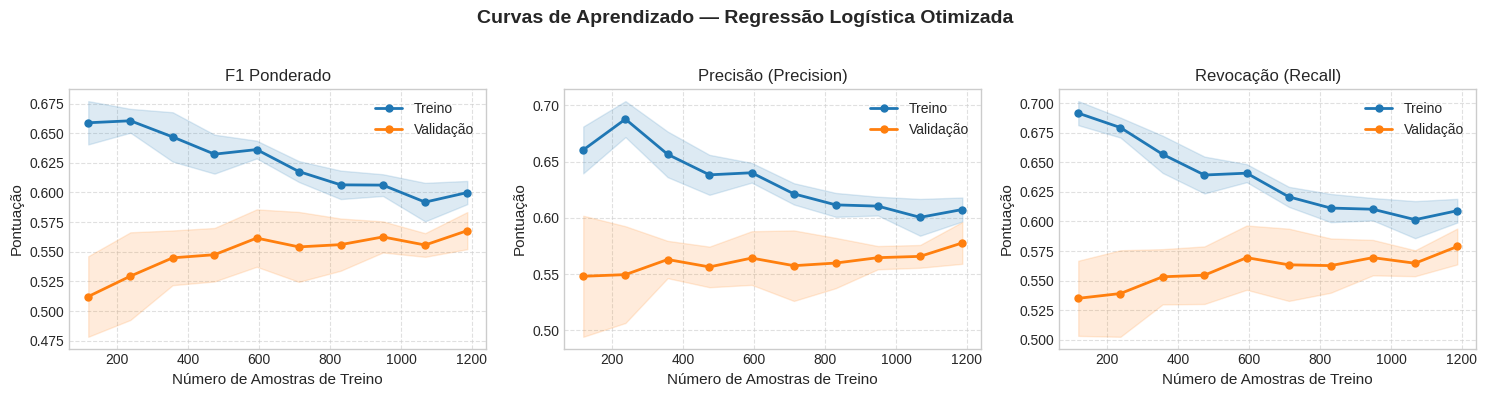

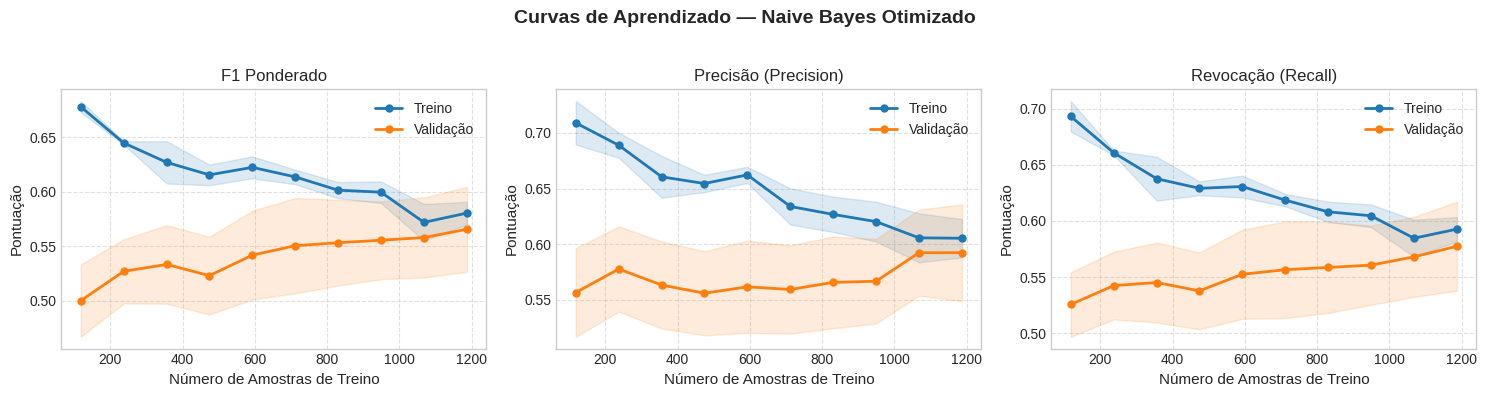

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

plt.style.use('seaborn-v0_8-whitegrid')


def plotar_curvas_aprendizado_todas_metricas(modelo, titulo, X, y, cv=5,
                                             n_jobs=-1, tamanhos_treino=np.linspace(0.1, 1.0, 10)):
    """
    Plota as curvas de aprendizado (F1, Precisão e Revocação) para um modelo de aprendizado de máquina.
    """

    metricas = {
        'f1_weighted': 'F1 Ponderado',
        'precision_weighted': 'Precisão (Precision)',
        'recall_weighted': 'cobertura (Recall)'
    }

    plt.figure(figsize=(15, 4))
    plt.suptitle(titulo, fontsize=14, fontweight='bold')

    for i, (metrica, rotulo) in enumerate(metricas.items(), start=1):
        plt.subplot(1, 3, i)
        plt.title(rotulo, fontsize=12)

        tamanhos_treino, pontuacoes_treino, pontuacoes_teste = learning_curve(
            modelo, X, y, cv=cv, n_jobs=n_jobs,
            train_sizes=tamanhos_treino, scoring=metrica
        )

        media_treino = np.mean(pontuacoes_treino, axis=1)
        desvio_treino = np.std(pontuacoes_treino, axis=1)
        media_teste = np.mean(pontuacoes_teste, axis=1)
        desvio_teste = np.std(pontuacoes_teste, axis=1)

        plt.fill_between(tamanhos_treino,
                         media_treino - desvio_treino,
                         media_treino + desvio_treino,
                         color="#1f77b4", alpha=0.15)
        plt.fill_between(tamanhos_treino,
                         media_teste - desvio_teste,
                         media_teste + desvio_teste,
                         color="#ff7f0e", alpha=0.15)

        plt.plot(tamanhos_treino, media_treino, 'o-', color="#1f77b4",
                 label="Treino", linewidth=2, markersize=5)
        plt.plot(tamanhos_treino, media_teste, 'o-', color="#ff7f0e",
                 label="Validação", linewidth=2, markersize=5)

        plt.xlabel("Número de Amostras de Treino", fontsize=11)
        plt.ylabel("Pontuação", fontsize=11)
        plt.legend(loc="best", fontsize=10)
        plt.grid(True, linestyle='--', alpha=0.6)

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()


# ======= MODELOS =======
parametros_rl = modelo_rl_otimizado.get_params()
pipeline_rl_para_plotar = Pipeline([
    ('padronizador', StandardScaler()),
    ('regressao_logistica', LogisticRegression(
        C=parametros_rl['C'],
        penalty=parametros_rl['penalty'],
        solver=parametros_rl['solver'],
        random_state=parametros_rl['random_state'],
        max_iter=parametros_rl['max_iter']
    ))
])

parametros_nb = modelo_naive_bayes_otimizado.get_params()
naive_bayes_para_plotar = GaussianNB(var_smoothing=parametros_nb['var_smoothing'])


# ======= PLOTS =======
plotar_curvas_aprendizado_todas_metricas(
    pipeline_rl_para_plotar,
    "Curvas de Aprendizado — Regressão Logística Otimizada",
    X, y, cv=5
)

plotar_curvas_aprendizado_todas_metricas(
    naive_bayes_para_plotar,
    "Curvas de Aprendizado — Naive Bayes Otimizado",
    X, y, cv=5
)


## k-vizinhos mais próximos (k-NN)

## Random Forest

# Resultados